In [1]:
# Lets try divided differences on a simple
# example

f = exp
f′ = exp


# want to compute f′(x) = f′(1) (= ℯ)
x = 1

# try a very small h
h = 2.0^(-52)
(f(x+h) - f(x))/h # FAIL! 4 ≠ ℯ

4.0

In [4]:
# Making h _bigger_ somewhat succeeds (??):
h = 2.0^(-25)
(f(x+h) - f(x))/h - ℯ # accurate to roughly 8 digits

5.156205018508331e-8

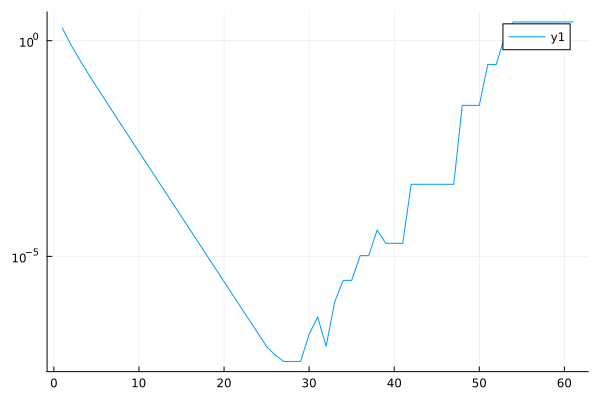

In [6]:
# Lets plot the error as a function of h
using Plots

h = [2.0^k for k=0:-1:-60] # h = [1,1/2,1/4,…,1/2^(-60)]

# starts converging.... then starts diverging
plot((abs.((f.(x .+ h) .- f(x))./h .- f′(x))); yscale=:log10)

# next lecture we will explain this by bounding the error